# Import Data

In [1]:
import json

with open('urban_dict_data_cleaned_emo.json', 'r') as file:
    urban_dict_data = json.load(file)

In [2]:
print(len(urban_dict_data))

77949


# Characteristics

In [3]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool
import numpy as np
from bokeh.io import export_png

In [4]:
def first_char(slang):
  output_notebook()

  first_chars = [s[0].upper() for s in slang]
  unique_chars, counts = np.unique(first_chars, return_counts=True)

  sorted_indices = np.argsort(counts)[::-1]  # Get indices that would sort counts in ascending order
  unique_chars_sorted = unique_chars[sorted_indices]
  counts_sorted = counts[sorted_indices]

  p = figure(x_range=unique_chars_sorted,\
             title="Number of Slang Starting With Each Character",\
             x_axis_label='First Character',\
             y_axis_label='Count')

  # Create vertical bars
  p.vbar(x=unique_chars_sorted, top=counts_sorted, width=0.5)

  # Customize plot aesthetics
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Character", "@x"), ("Count", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [5]:
slang = []
for key in urban_dict_data:
  slang.append(key)
first_char(slang)

In [6]:
def alpha(slang):
  output_notebook()

  num_alpha = 0
  num_non_alpha = 0
  for s in slang:
    words = s.split()
    word_count = 0
    all_alpha = True
    for word in words:
      if not (word.isalpha() and word.isascii()):
        all_alpha = False
        break
    if all_alpha:
      num_alpha += 1
    else:
      num_non_alpha += 1

  percent_alpha = num_alpha/(num_alpha+ num_non_alpha)*100
  percent_non_alpha = num_non_alpha/(num_alpha+ num_non_alpha)*100

  categories = ['Alphabetic', 'Non-Alphabetic']
  percents = [percent_alpha, percent_non_alpha]

  p = figure(x_range=categories, title="Alphabetic vs Non-Alphabetic", x_axis_label="Slang", y_axis_label="Percent")

  p.vbar(x=categories, top=percents, width=0.9)

  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Slang Type", "@x"), ("Percent", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [7]:
alpha(slang)

In [8]:
def first_letter(slang):
  output_notebook()

  first_letters = []
  for s in slang:
    if s[0].isalpha():
      first_letters.append(s[0].upper())

  unique_letters, counts = np.unique(first_letters, return_counts=True)

  sorted_indices = np.argsort(counts)[::-1]  # Get indices that would sort counts in ascending order
  unique_letters_sorted = unique_letters[sorted_indices]
  counts_sorted = counts[sorted_indices]

  p = figure(x_range=unique_letters_sorted,\
             title="Number of Slang Starting With Each Letter",\
             x_axis_label='First Letter',\
             y_axis_label='Count')

  # Create vertical bars
  p.vbar(x=unique_letters_sorted, top=counts_sorted, width=0.5)

  # Customize plot aesthetics
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Letter", "@x"), ("Count", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [9]:
first_letter(slang)

In [10]:
def top_letters(slang, top=10):
  output_notebook()

  first_letters = []
  for s in slang:
    if s[0].isalpha():
      first_letters.append(s[0].upper())

  unique_letters, counts = np.unique(first_letters, return_counts=True)

  indices_of_top = np.argsort(counts)[-top:][::-1]
  top_letters= unique_letters[indices_of_top]
  top_counts = counts[indices_of_top]

  p = figure(x_range=top_letters,\
             title=f"Top {top} First Letters of Slang",\
             x_axis_label='First Letter',\
             y_axis_label='Count')

  # Create vertical bars
  p.vbar(x=top_letters, top=top_counts, width=0.5)

  # Customize plot aesthetics
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Letter", "@x"), ("Count", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [11]:
top_letters(slang)

In [12]:
# number of words both whitespace and dashes NO
def number_of_words(slang):
  output_notebook()

  num_words = {}
  for s in slang:
    words = s.split()
    word_count = 0
    for word in words:
      if '-' in word:
        word_count += len(word.split('-'))
      else:
        word_count += 1
    num_words[word_count] = num_words.get(word_count, 0) + 1

  sorted_dict = dict(sorted(num_words.items(), key=lambda item: item[1], reverse=True))

  counts = list(sorted_dict.keys())
  counts = [str(count) for count in counts]
  frequencies = list(sorted_dict.values())

  p = figure(x_range=counts,\
             title="Number of Words in Slang",\
             x_axis_label='Number of Words',\
             y_axis_label='Frequency')

  # Create vertical bars
  p.vbar(x=counts, top=frequencies, width=0.9)

  # Customize plot aesthetics
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Number of Words", "@x"), ("Frequency", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [13]:
number_of_words(slang)

In [14]:
# number of words separated by whitespace
def num_words(slang):
  output_notebook()

  num_words = {}
  for s in slang:
    word_count = len(s.split())
    num_words[word_count] = num_words.get(word_count, 0) + 1

  sorted_dict = dict(sorted(num_words.items(), key=lambda item: item[1], reverse=True))

  counts = list(sorted_dict.keys())
  counts = [str(count) for count in counts]
  frequencies = list(sorted_dict.values())

  p = figure(x_range=counts,\
             title="Number of Words in Slang",\
             x_axis_label='Number of Words',\
             y_axis_label='Frequency')

  # Create vertical bars
  p.vbar(x=counts, top=frequencies, width=0.9)

  # Customize plot aesthetics
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Number of Words", "@x"), ("Frequency", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [15]:
num_words(slang)

In [16]:
# number of words separated by dashes
def num_dashes_vs_no_dashes(slang):
  output_notebook()

  num_dashes = 0
  num_no_dashes = 0
  for s in slang:
    if '-' in s:
      num_dashes += 1
    else:
      num_no_dashes += 1

  print(f"Percent of Slang with Dashes: {num_dashes/(num_dashes+ num_no_dashes)*100}")

  categories = ['With Dashes', 'Without Dashes']
  counts = [num_dashes, num_no_dashes]

  p = figure(x_range=categories, title="Dashes vs No Dashes", x_axis_label="Slang", y_axis_label="Count")

  p.vbar(x=categories, top=counts, width=0.9)

  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Slang Type", "@x"), ("Frequency", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [17]:
num_dashes_vs_no_dashes(slang)

Percent of Slang with Dashes: 3.127686051135999


In [18]:
!pip install pronouncing

In [19]:
import pronouncing

def phoenetics(slang, top=None):
  sound_counts = {}

  for s in slang:
    phones = pronouncing.phones_for_word(s)
    if not phones:
      continue
    for phone in phones[0].split():
      sound_counts[phone] = sound_counts.get(phone, 0) + 1

  sorted_dict = dict(sorted(sound_counts.items(), key=lambda item: item[1], reverse=True))

  sounds = list(sorted_dict.keys())
  counts = list(sorted_dict.values())
  title = "Frequency of Phones in Slang"

  if top is not None:
    sounds = sounds[0:top]
    counts = counts[0:top]
    title = f"Top {top} Phones in Slang"

  p = figure(x_range=sounds,\
             title=title,\
             x_axis_label='Phones',\
             y_axis_label='Frequency',\
             width=1000)

  # Create vertical bars
  p.vbar(x=sounds, top=counts, width=0.5)

  # Customize plot aesthetics
  p.xaxis.major_label_orientation = "vertical"
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Phone", "@x"), ("Frequency", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [20]:
phoenetics(slang)

In [21]:
phoenetics(slang, top=10)

Compare with English Dictionary

In [22]:
import pandas as pd
df = pd.read_csv('englishdict.csv')
#print(df.head())

columns_as_lists = {col: df[col].tolist() for col in df.columns}
english_words = columns_as_lists['word']
non_slang = []
for i, w in enumerate(english_words):
  if not isinstance(w, str):
    w = str(w)
    print(type(w))
  non_slang.append(w)

print(non_slang[0:10])

<class 'str'>
<class 'str'>
['abbacy', 'abductor', 'abas', 'abasement', 'abampere', 'abduction', 'Aberdeen', 'abator', 'abasia', 'abacus']


In [23]:
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.transform import factor_cmap

def get_percents(words):
  num_alpha = 0
  num_non_alpha = 0
  for s in words:
    words = s.split()
    word_count = 0
    all_alpha = True
    for word in words:
      if not (word.isalpha() and word.isascii()):
        all_alpha = False
        break
    if all_alpha:
      num_alpha += 1
    else:
      num_non_alpha += 1

  percent_alpha = num_alpha/(num_alpha+ num_non_alpha)*100
  percent_non_alpha = num_non_alpha/(num_alpha+ num_non_alpha)*100

  return percent_alpha, percent_non_alpha

def compare_alpha(slang, non_slang):
  percent_s_alpha, percent_s_non_alpha = get_percents(slang)
  percent_ns_alpha, percent_ns_non_alpha = get_percents(non_slang)

  categories = ['Urban Dictionary', 'Standard Dictionary']
  percents = [percent_s_alpha, percent_ns_alpha, percent_s_non_alpha, percent_ns_non_alpha]
  compare = ["Alphabetic", "Non-Alphabetic"]

  x = [(c, category) for c in compare for category in categories]

  palette = ['#718dbf', '#e84d60']  # Blue for Definition, Red for Example

  source = ColumnDataSource(data=dict(x=x, percents=percents, category=categories*2))

  p = figure(x_range=FactorRange(*x),
           height=400,
           title="Comparison of Alphabetic Words in Urban Dictionary and Standard Dictionary",
           toolbar_location=None,
           tools="")

  p.vbar(x='x', top='percents', width=0.8, source=source,
       fill_color=factor_cmap('x', palette=palette, factors=categories, start=1), legend_field='category')

  # Add aesthetics
  p.y_range.start = 0
  p.xaxis.major_label_orientation = "vertical"
  p.xaxis.major_label_text_font_size = '0pt'
  p.x_range.range_padding = 0.05
  p.xgrid.grid_line_color = None
  p.xaxis.axis_label = "Word Type"
  p.yaxis.axis_label = "Percent"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Type of Dictionary", "@x"), ("Percent", "@percents")]
  p.add_tools(hover)

  show(p)

In [24]:
compare_alpha(slang, non_slang)
#export_png(p, filename="alpha_comparison.png")

In [25]:
def get_letter_percents(words):
  first_letters = []
  for s in words:
    if s[0].isalpha():
      first_letters.append(s[0].upper())

  unique_letters, counts = np.unique(first_letters, return_counts=True)

  percents = []
  total = np.sum(counts)
  for c in counts:
    percents.append(c/total*100)

  return unique_letters, percents

def compare_first_letter(slang, non_slang):
  output_notebook()

  s_first, s_percents = get_letter_percents(slang)
  ns_first, ns_percents = get_letter_percents(non_slang)

  compare_first_deltas(s_first, s_percents, ns_percents)

  categories = ['Urban Dictionary', 'Standard Dictionary']
  compare = s_first
  percents = []
  for i, p in enumerate(s_percents):
    percents.append(p)
    percents.append(ns_percents[i])

  x = [(c, category) for c in compare for category in categories]

  palette = ['#718dbf', '#e84d60']  # Blue for Definition, Red for Example

  source = ColumnDataSource(data=dict(x=x, percents=percents, category=categories*26))

  p = figure(x_range=FactorRange(*x),
           height=400,
           title="Comparison of First Letter of Words in Urban Dictionary and Standard Dictionary",
           toolbar_location=None,
           tools="")

  p.vbar(x='x', top='percents', width=0.8, source=source,
       fill_color=factor_cmap('x', palette=palette, factors=categories, start=1),legend_field='category')

  # Add aesthetics
  p.y_range.start = 0
  p.xaxis.major_label_text_font_size = '0pt'
  p.x_range.range_padding = 0.05
  p.xgrid.grid_line_color = None
  p.xaxis.axis_label = "First Letter"
  p.yaxis.axis_label = "Percent"

  p.legend.location = 'top_left'

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("First Letter", "@x"), ("Percent", "@percents")]
  p.add_tools(hover)

  show(p)

def compare_first_deltas(letters, s, ns):
  percent_delta = []
  for i, p in enumerate(s):
    percent_delta.append(abs(p - ns[i]))

  d = dict(zip(letters, percent_delta))

  sorted_dict = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

  letters = list(sorted_dict.keys())
  percent_delta = list(sorted_dict.values())

  p = figure(x_range=letters,\
             title="Delta of First Letter Percents ",\
             x_axis_label='First Letter',\
             y_axis_label='Delta',\
             width=1000)

  # Create vertical bars
  p.vbar(x=letters, top=percent_delta, width=0.5)

  # Customize plot aesthetics
  p.xaxis.major_label_orientation = "vertical"
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("First Letter", "@x"), ("Delta", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [26]:
compare_first_letter(slang, non_slang)

In [27]:
def get_phone_percents(words):
  p = []
  for s in words:
    phones = pronouncing.phones_for_word(s)
    if not phones:
      continue
    for phone in phones[0].split():
      p.append(phone)
  unique_phones, counts = np.unique(p, return_counts=True)

  percents = []
  total = np.sum(counts)
  for c in counts:
    percents.append(c/total*100)

  return unique_phones, percents

def compare_phones(slang, non_slang):
  output_notebook()

  s_first, s_percents = get_phone_percents(slang)
  ns_first, ns_percents = get_phone_percents(non_slang)

  compare_phone_deltas(s_first, s_percents, ns_percents)

  categories = ['Urban Dictionary', 'Standard Dictionary']
  compare = s_first
  percents = []
  for i, p in enumerate(s_percents):
    percents.append(p)
    percents.append(ns_percents[i])

  x = [(c, category) for c in compare for category in categories]

  palette = ['#718dbf', '#e84d60']  # Blue for Definition, Red for Example

  source = ColumnDataSource(data=dict(x=x, percents=percents, category=categories*len(s_first)))

  p = figure(x_range=FactorRange(*x),
           height=400,
           title="Comparison of Phones in Words of Urban Dictionary and Standard Dictionary",
           toolbar_location=None,
           tools="",width=2000)

  p.vbar(x='x', top='percents', width=0.8, source=source,
       fill_color=factor_cmap('x', palette=palette, factors=categories, start=1),legend_field='category')

  # Add aesthetics
  p.y_range.start = 0
  p.xaxis.major_label_text_font_size = '0pt'
  p.x_range.range_padding = 0.05
  p.xgrid.grid_line_color = None
  p.xaxis.major_label_orientation = 0.785
  p.xaxis.axis_label = "Phone"
  p.yaxis.axis_label = "Percent"

  p.legend.location = 'top_right'

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Phone", "@x"), ("Percent", "@percents")]
  p.add_tools(hover)

  show(p)

def compare_phone_deltas(phones, s, ns):
  percent_delta = []
  for i, p in enumerate(s):
    percent_delta.append(abs(p - ns[i]))

  d = dict(zip(phones, percent_delta))

  sorted_dict = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

  phones = list(sorted_dict.keys())
  percent_delta = list(sorted_dict.values())

  p = figure(x_range=phones,\
             title="Delta of Phone Percents ",\
             x_axis_label='Phone',\
             y_axis_label='Delta',\
             width=1000)

  # Create vertical bars
  p.vbar(x=phones, top=percent_delta, width=0.5)

  # Customize plot aesthetics
  p.xaxis.major_label_orientation = "vertical"
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Phone", "@x"), ("Delta", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [28]:
compare_phones(slang, non_slang)

In [29]:
def compare_num_words(non_slang):
  for s in non_slang:
    num = (len(s.split()))
    if num > 1:
      print("multiword!")

In [30]:
compare_num_words(non_slang)

In [31]:
def dash_percent(words):
  num_dashes = 0
  num_no_dashes = 0
  for s in words:
    if '-' in s:
      num_dashes += 1
    else:
      num_no_dashes += 1

  percent_dash = num_dashes/(num_dashes+ num_no_dashes)*100
  percent_no_dash = num_no_dashes/(num_dashes+ num_no_dashes)*100

  return percent_dash, percent_no_dash

def compare_dashes(slang, non_slang):
  percent_s_dash, percent_s_no_dash = dash_percent(slang)
  percent_ns_dash, percent_ns_no_dash = dash_percent(non_slang)

  categories = ['Urban Dictionary', 'Standard Dictionary']
  percents = [percent_s_dash, percent_ns_dash, percent_s_no_dash, percent_ns_no_dash]
  print(percents)
  compare = ["With Dashes", "Without Dashes"]

  x = [(c, category) for c in compare for category in categories]

  palette = ['#718dbf', '#e84d60']  # Blue for Definition, Red for Example

  source = ColumnDataSource(data=dict(x=x, percents=percents, category=categories*2))

  p = figure(x_range=FactorRange(*x),
           height=400,
           title="Comparison of Words with Dashes vs No Dashes in Urban Dictionary and Standard Dictionary",
           toolbar_location=None,
           tools="")

  p.vbar(x='x', top='percents', width=0.8, source=source,
       fill_color=factor_cmap('x', palette=palette, factors=categories, start=1), legend_field='category')

  # Add aesthetics
  p.y_range.start = 0
  p.xaxis.major_label_orientation = "vertical"
  p.xaxis.major_label_text_font_size = '0pt'
  p.x_range.range_padding = 0.05
  p.xgrid.grid_line_color = None
  p.xaxis.axis_label = "Type"
  p.yaxis.axis_label = "Percent"

  p.legend.location = 'top_left'

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Type", "@x"), ("Percent", "@percents")]
  p.add_tools(hover)

  show(p)

In [32]:
compare_dashes(slang, non_slang)

[3.127686051135999, 0.0, 96.87231394886399, 100.0]


# Explore

In [33]:
def most_popular(urban_dict, slang, top=10):
  output_notebook()

  thumbs_up = []
  for s in slang:
    thumbs_up.append(urban_dict[s]['top_5_entries'][0]['thumbs_up'])

  indices_of_top = np.argsort(thumbs_up)[-top:][::-1]
  top_slang = np.array(slang)[indices_of_top]
  top_thumbs = np.array(thumbs_up)[indices_of_top]

  p = figure(x_range=top_slang,\
             title=f"Top {top} Most Popular Slang",\
             x_axis_label='Slang',\
             y_axis_label='Number of Thumbs Up')

  # Create vertical bars
  p.vbar(x=top_slang, top=top_thumbs, width=0.9)

  # Customize plot aesthetics
  p.xaxis.major_label_orientation = "vertical"
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Slang", "@x"), ("Number of Thumbs Up", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [34]:
most_popular(urban_dict_data, slang)

In [123]:
def num_entries(urban_dict, slang):
  output_notebook()

  entries_count = {}
  for s in slang:
    entries = urban_dict[s]['num_entries']
    entries_count[entries] = entries_count.get(entries, 0) + 1

  sorted_dict = dict(sorted(entries_count.items(), key=lambda item: item[1], reverse=True))

  entries = list(sorted_dict.keys())
  for i, entry in enumerate(entries):
    if entry != 10:
      entries[i] = str(entry)
    else:
      entries[i] = "10+"
  counts = list(sorted_dict.values())

  p = figure(x_range=entries,\
             title="Number of Entries Per Slang",\
             x_axis_label="Number of Entries",\
             y_axis_label='Frequency')

  # Create vertical bars
  p.vbar(x=entries, top=counts, width=0.9)

  # Customize plot aesthetics
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Number of Entries", "@x"), ("Frequency", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

  # PERCENT
  total = np.sum(counts)
  percents = []
  for c in counts:
    percents.append(c/total*100)

  p = figure(x_range=entries,\
             title="Number of Entries Per Slang",\
             x_axis_label="Number of Entries",\
             y_axis_label='Percent')

  # Create vertical bars
  p.vbar(x=entries, top=percents, width=0.9)

  # Customize plot aesthetics
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Number of Entries", "@x"), ("Percent", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [124]:
num_entries(urban_dict_data, slang)

In [37]:
def curse_words(urban_dict, example=True):
  curse_words = ["fuck",\
                 "shit",\
                 "bitch",\
                 "crap",\
                 "ass",\
                 "damn",\
                 ]

  curse_counts = {word: 0 for word in curse_words}

  ex_or_def = 'example' if example else 'definition'
  for slang, info in urban_dict.items():
    for entry in info['top_5_entries']:
      text = entry[ex_or_def]
      for curse in curse_counts:
        count = text.lower().count(curse)
        curse_counts[curse] = curse_counts.get(curse, 0) + count

  sorted_dict = dict(sorted(curse_counts.items(), key=lambda item: item[1], reverse=True))

  curse = list(sorted_dict.keys())
  counts = list(sorted_dict.values())
  if example:
    title = "Frequency of Curse Words in Examples"
  else:
    title = "Frequency of Curse Words in Definitions"

  p = figure(x_range=curse,\
             title=title,\
             x_axis_label='Curse Words',\
             y_axis_label='Frequency')

  # Create vertical bars
  p.vbar(x=curse, top=counts, width=0.9)

  # Customize plot aesthetics
  p.xaxis.major_label_orientation = "vertical"
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Curse Word", "@x"), ("Frequency", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [38]:
curse_words(urban_dict_data, False)

In [39]:
curse_words(urban_dict_data, True)

In [147]:
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.transform import factor_cmap

def compare_curse_words(urban_dict):
  curse_words = ["fuck",\
                 "shit",\
                 "bitch",\
                 "crap",\
                 "ass",\
                 "damn",\
                 ]

  def_curse_counts = {word: 0 for word in curse_words}
  ex_curse_counts = {word: 0 for word in curse_words}

  for slang, info in urban_dict.items():
    for entry in info['top_5_entries']:
      definition = entry['definition']
      example = entry['example']
      for curse in curse_words:
        def_count = definition.lower().count(curse)
        ex_count = example.lower().count(curse)
        def_curse_counts[curse] = def_curse_counts.get(curse, 0) + def_count
        ex_curse_counts[curse] = ex_curse_counts.get(curse, 0) + ex_count

  # Labels for x-axis
  categories = ['Definition', 'Example']
  x = [(curse, category) for curse in curse_words for category in categories]

  counts = []
  for curse in curse_words:
    counts.append(def_curse_counts[curse])
    counts.append(ex_curse_counts[curse])

  palette = ['#718dbf', '#e84d60']  # Blue for Definition, Red for Example

  source = ColumnDataSource(data=dict(x=x, counts=counts, category=categories*len(curse_words)))

  p = figure(x_range=FactorRange(*x),
           height=400,
           title="Comparison of Curse Word Counts in Definitions and Examples",
           toolbar_location=None,
           tools="")

  p.vbar(x='x', top='counts', width=0.8, source=source,
       fill_color=factor_cmap('x', palette=palette, factors=categories, start=1), legend_field='category')

  # Add aesthetics
  p.y_range.start = 0
  p.xaxis.major_label_orientation = "vertical"
  p.xaxis.major_label_text_font_size = '0pt'
  p.x_range.range_padding = 0.05
  p.xgrid.grid_line_color = None
  p.xaxis.axis_label = "Curse Word"
  p.yaxis.axis_label = "Count"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Curse Word", "@x"), ("Count", "@counts")]
  p.add_tools(hover)

  show(p)

In [148]:
compare_curse_words(urban_dict_data)

In [125]:
def related(urban_dict):
  related_counts = {}

  for slang, info in urban_dict.items():
    for entry in info['top_5_entries']:
      num_related = len(entry['related'])
      if num_related >= 10:
        key = "10+"
      else:
        key = str(num_related)
      related_counts[key] = related_counts.get(key, 0) + 1

  sorted_dict = dict(sorted(related_counts.items(), key=lambda item: item[1], reverse=True))

  related = list(sorted_dict.keys())
  related = [str(r) for r in related]
  counts = list(sorted_dict.values())

  p = figure(x_range=related,\
             title="Number of Related Slang Per Definition",\
             x_axis_label='Number of Related Slang',\
             y_axis_label='Frequency')

  # Create vertical bars
  p.vbar(x=related, top=counts, width=0.5)

  # Customize plot aesthetics
  p.xaxis.major_label_orientation = "vertical"
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Number of Related Slang", "@x"), ("Frequency", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

  # PERCENT
  percents = []
  total = np.sum(counts)
  for c in counts:
    percents.append(c/total*100)
  p = figure(x_range=related,\
             title="Number of Related Slang Per Definition",\
             x_axis_label='Number of Related Slang',\
             y_axis_label='Percent')

  # Create vertical bars
  p.vbar(x=related, top=percents, width=0.5)

  # Customize plot aesthetics
  p.xaxis.major_label_orientation = "vertical"
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Number of Related Slang", "@x"), ("Percent", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [126]:
related(urban_dict_data)

In [44]:
def related_10(urban_dict):
  related_counts = {}

  for slang, info in urban_dict.items():
    for entry in info['top_5_entries']:
      num_related = len(entry['related'])
      related_counts[num_related] = related_counts.get(num_related, 0) + 1

  sorted_dict = dict(sorted(related_counts.items(), key=lambda item: item[1], reverse=True))

  related = list(sorted_dict.keys())[0:10]
  related = [str(r) for r in related]
  counts = list(sorted_dict.values())[0:10]

  p = figure(x_range=related,\
             title="Number of Related Slang Per Definition",\
             x_axis_label='Number of Related Slang',\
             y_axis_label='Frequency')

  # Create vertical bars
  p.vbar(x=related, top=counts, width=0.5)

  # Customize plot aesthetics
  p.xaxis.major_label_orientation = "vertical"
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Number of Related Slang", "@x"), ("Frequency", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

In [45]:
related_10(urban_dict_data)

In [46]:
import pandas as pd
from bokeh.palettes import Category20

data = []
for word, info in urban_dict_data.items():
  entry = {}
  entry['word'] = word
  entry['date'] = info['top_5_entries'][0]['date'][0:10]
  data.append(entry)

date_df = pd.DataFrame(data)

date_df['date'] = pd.to_datetime(date_df['date'])
date_df['year'] = date_df['date'].dt.year
date_df['month_datetime'] = date_df['date'].dt.to_period('M').dt.to_timestamp()
date_df['year_datetime'] = pd.to_datetime(date_df['year'], format='%Y')
print(date_df.head())

        word       date  year month_datetime year_datetime
0       word 2003-08-21  2003     2003-08-01    2003-01-01
1      Janky 2002-12-08  2002     2002-12-01    2002-01-01
2  hard-core 2004-10-14  2004     2004-10-01    2004-01-01
3     brutal 2006-07-05  2006     2006-07-01    2006-01-01
4    massive 2003-07-10  2003     2003-07-01    2003-01-01


In [47]:
def date_info_by_year_top(df):
  word_counts = df.groupby('year_datetime').size().reset_index(name='count')
  word_counts['year_datetime'] = word_counts['year_datetime'].astype(str).str[:4]

  source = ColumnDataSource(word_counts)

  p = figure(x_range=word_counts['year_datetime'], height=400, width=800,
           title=f"Number of Slang by Year (Top Entry)")

  p.vbar(x='year_datetime', top='count', width=0.8, source=source, color=Category20[20][0])

  p.xaxis.axis_label = "Year"
  p.yaxis.axis_label = "Count"
  p.xgrid.grid_line_color = None
  p.xaxis.major_label_orientation = 45
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        ("Year", "@year_datetime"),
        ("Count", "@count")
  ]
  p.add_tools(hover)

  show(p)

In [48]:
date_info_by_year_top(date_df)

In [49]:
def date_info_top(df, day=False, month=False, year=False):
  output_notebook()

  if day:
    x = 'date'
    x_label = 'Date'
  elif month:
    x = 'month_datetime'
    x_label = 'Month'
  elif year:
    x = 'year_datetime'
    x_label = 'Year'
  else:
    print("Select day, month, or year")
    return

  word_counts = df.groupby(x).size().reset_index(name='count')
  source = ColumnDataSource(word_counts)

  p = figure(x_axis_type='datetime', x_axis_label=x_label, y_axis_label="Count", title=f"Number of Slang by {x_label} (Top Entry)", height=400, width=800)
  p.line(x=x, y='count', source=source, line_width=2)

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        (x_label, f"@{x}{{%F}}"),
        ("Count", "@count")
    ]
  hover.formatters = {f'@{x}': 'datetime'}
  p.add_tools(hover)

  # Show the plot
  show(p)

In [50]:
date_info_top(date_df, day=True)
date_info_top(date_df, month=True)
date_info_top(date_df, year=True)

In [51]:
def date_all_entries(urban_dict):
  data = []
  for word, info in urban_dict.items():
    for e in info['top_5_entries']:
      entry = {}
      entry['word'] = word
      entry['date'] = e['date'][0:10]
      data.append(entry)

  date_df = pd.DataFrame(data)

  date_df['date'] = pd.to_datetime(date_df['date'])
  date_df['year'] = date_df['date'].dt.year
  date_df['month_datetime'] = date_df['date'].dt.to_period('M').dt.to_timestamp()
  date_df['year_datetime'] = pd.to_datetime(date_df['year'], format='%Y')
  print(date_df.head())

  return date_df

In [52]:
date_df_all = date_all_entries(urban_dict_data)

   word       date  year month_datetime year_datetime
0  word 2003-08-21  2003     2003-08-01    2003-01-01
1  word 2005-05-30  2005     2005-05-01    2005-01-01
2  word 2003-12-26  2003     2003-12-01    2003-01-01
3  word 2006-11-13  2006     2006-11-01    2006-01-01
4  word 2006-07-08  2006     2006-07-01    2006-01-01


In [53]:
def date_info_by_year_all(df):
  word_counts = df.groupby('year_datetime').size().reset_index(name='count')
  word_counts['year_datetime'] = word_counts['year_datetime'].astype(str).str[:4]

  source = ColumnDataSource(word_counts)

  p = figure(x_range=word_counts['year_datetime'], height=400, width=800,
           title=f"Number of Slang by Year (All Entries)")

  p.vbar(x='year_datetime', top='count', width=0.8, source=source, color=Category20[20][0])

  p.xaxis.axis_label = "Year"
  p.yaxis.axis_label = "Count"
  p.xgrid.grid_line_color = None
  p.xaxis.major_label_orientation = 45
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        ("Year", "@year_datetime"),
        ("Count", "@count")
  ]
  p.add_tools(hover)

  show(p)

In [54]:
date_info_by_year_all(date_df_all)

In [55]:
def date_info_all(df, day=False, month=False, year=False):
  output_notebook()

  if day:
    x = 'date'
    x_label = 'Date'
  elif month:
    x = 'month_datetime'
    x_label = 'Month'
  elif year:
    x = 'year_datetime'
    x_label = 'Year'
  else:
    print("Select day, month, or year")
    return

  word_counts = df.groupby(x).size().reset_index(name='count')
  source = ColumnDataSource(word_counts)

  p = figure(x_axis_type='datetime', x_axis_label=x_label, y_axis_label="Count", title=f"Number of Slang by {x_label} (All Entries)", height=400, width=800)
  p.line(x=x, y='count', source=source, line_width=2)

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        (x_label, f"@{x}{{%F}}"),
        ("Count", "@count")
    ]
  hover.formatters = {f'@{x}': 'datetime'}
  p.add_tools(hover)

  # Show the plot
  show(p)

In [56]:
date_info_all(date_df_all, day=True)
date_info_all(date_df_all, month=True)
date_info_all(date_df_all, year=True)

In [57]:
!pip install fasttext

In [58]:
import fasttext
import numpy as np
from sklearn.decomposition import PCA
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import column

In [59]:
def run_pca(slang):
  model = fasttext.load_model("urban_slang_ft.bin")
  word_vectors = np.array([model.get_word_vector(word) for word in slang])

  pca = PCA(n_components=2)
  pca_result = pca.fit_transform(word_vectors)

  return pca_result, word_vectors

In [60]:
def scatter_pca(pca, slang, n=None):
  if n is not None:
      indices = np.random.choice(len(pca), n, replace=False)
      pca = pca[indices]
      slang = np.array(slang)[indices]

  source = ColumnDataSource(data=dict(
    x=pca[:, 0],
    y=pca[:, 1],
    slang=slang
  ))

  p = figure(title="PCA of FastText Word Embeddings",
           x_axis_label='Principal Component 1',
           y_axis_label='Principal Component 2',
           tools="pan,box_zoom,reset,hover")

  # Add scatter points
  p.scatter(x='x', y='y', source=source, size=10, alpha=0.6)

  # Add hover tool
  p.add_tools(
    HoverTool(
        tooltips=[("Slang", "@slang")]
    )
  )

  output_notebook()
  show(p)

In [61]:
pca, word_embeddings = run_pca(slang)

In [62]:
scatter_pca(pca, slang)

In [63]:
scatter_pca(pca, slang, n=10)
scatter_pca(pca, slang, n=50)
scatter_pca(pca, slang, n=100)

In [114]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
def find_k(word_embeddings):

  inertias = []
  k_range = range(1, 50)
  for k in k_range:
      km = KMeans(n_clusters=k, random_state=42)
      km.fit(word_embeddings)
      inertias.append(km.inertia_)

  plt.plot(k_range, inertias, marker='o')
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('Inertia')
  plt.title('Elbow Method for Optimal k')
  plt.grid(True)
  plt.show()

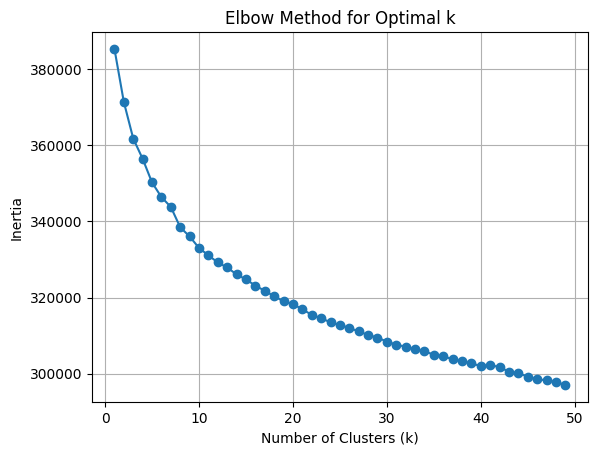

In [115]:
find_k(word_embeddings)

In [129]:
from sklearn.cluster import KMeans
from bokeh.plotting import figure, show, output_notebook
import numpy as np
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import Category10

def scatter_pca_with_clustering(word_embeddings, pca, slang, n_clusters=5, num_points=None):
    if num_points is not None:
      indices = np.random.choice(len(pca), num_points, replace=False)
      pca = pca[indices]
      slang = np.array(slang)[indices]
      word_embeddings = word_embeddings[indices]

    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(word_embeddings)

    clusters_str = [str(c) for c in clusters]

    source = ColumnDataSource(data=dict(
        x=pca[:, 0],
        y=pca[:, 1],
        slang=slang,
        cluster=clusters_str
    ))

    p = figure(title="PCA of FastText Word Embeddings (with Clusters)",
               x_axis_label='Principal Component 1',
               y_axis_label='Principal Component 2',
               tools="pan,box_zoom,reset,hover")

    color_mapper = CategoricalColorMapper(factors=[str(i) for i in range(n_clusters)],
                                          palette=Category10[n_clusters])

    p.scatter(x='x', y='y', source=source, size=10, color={'field': 'cluster', 'transform': color_mapper}, alpha=0.6)

    # Add hover tool
    p.add_tools(HoverTool(tooltips=[("Slang", "@slang"), ("Cluster", "@cluster")]))

    output_notebook()
    show(p)

In [133]:
scatter_pca_with_clustering(word_embeddings, pca, slang, n_clusters=9)

Output hidden; open in https://colab.research.google.com to view.

In [132]:
scatter_pca_with_clustering(word_embeddings, pca, slang, num_points=1000)

In [134]:
scatter_pca_with_clustering(word_embeddings, pca, slang, n_clusters=3)

Output hidden; open in https://colab.research.google.com to view.

In [69]:
import networkx as nx
import plotly.graph_objects as go
import random

In [70]:
def related_network_graph(urban_dict, n=50):
  # Initialize the graph
  G = nx.Graph()

  # Select n random slang words
  random_slang = random.sample(list(urban_dict.keys()), n)

  # Draw edges
  for slang in random_slang:
    for related in urban_dict[slang]['top_5_entries'][0]['related']:
      G.add_edge(slang, related)

  # Prepare the data for Plotly
  pos = nx.spring_layout(G, k=0.5)  # Layout for node positions
  edges = G.edges()
  edge_x = []
  edge_y = []
  for edge in edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

  # Create edge trace
  edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='gray'),
    hoverinfo='none',
    mode='lines'
  )

  # Create node trace
  node_x = []
  node_y = []
  for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

  # Color bar scale
  degrees = [G.degree(node) for node in G.nodes()]
  min_degree = min(degrees)
  max_degree = max(degrees)
  tickvals = list(range(min_degree, max_degree + 1))

  node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Plasma',
        size=20,
        colorbar=dict(
            thickness=15,
            title='Number of Connections',
            xanchor='left',
            titleside='right',
            tickmode='array',
            tickvals=tickvals
        )
    )
  )

  # Add hover text for nodes
  node_text = [f'{node}<br>Connections: {G.degree(node)}' for node in G.nodes()]
  node_trace.marker.color = [G.degree(node) for node in G.nodes()]
  node_trace.text = node_text

  # Create the figure and add edge and node traces
  fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title="Related Slang Network",
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    plot_bgcolor='white'
                ))

  # Show the plot
  fig.show()

In [71]:
related_network_graph(urban_dict_data, n=50)

# Deeper

In [153]:
def sentiment_counts(urban_dict):
  output_notebook()
  def_positive = 0
  def_negative = 0
  def_neutral = 0

  ex_positive = 0
  ex_negative = 0
  ex_neutral = 0

  for word in urban_dict:
    def_sentiment_label = urban_dict[word]['top_5_entries'][0]['definition_sentiment_label']
    if def_sentiment_label == 'positive':
      def_positive += 1
    elif def_sentiment_label == 'negative':
      def_negative += 1
    else:
      def_neutral += 1
    ex_sentiment_label = urban_dict[word]['top_5_entries'][0]['example_sentiment_label']
    if ex_sentiment_label == 'positive':
      ex_positive += 1
    elif ex_sentiment_label == 'negative':
      ex_negative += 1
    else:
      ex_neutral += 1

  labels = ['positive', 'negative', 'neutral']
  def_counts = [def_positive, def_negative, def_neutral]
  ex_counts = [ex_positive, ex_negative, ex_neutral]
  colors = ['green', 'red', 'gray']

  # DEFINITION SENTIMENT
  p = figure(x_range=labels,\
             title=f"Sentiment of Slang Definitions",\
             x_axis_label='Sentiment',\
             y_axis_label='Count')

  # Create vertical bars
  p.vbar(x=labels, top=def_counts, width=0.5, fill_color=colors)

  # Customize plot aesthetics
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Sentiment", "@x"), ("Count", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

  # EXAMPLE SENTIMENT
  p = figure(x_range=labels,\
             title=f"Sentiment of Slang Examples",\
             x_axis_label='Sentiment',\
             y_axis_label='Count')

  # Create vertical bars
  p.vbar(x=labels, top=ex_counts, width=0.5, fill_color=colors)

  # Customize plot aesthetics
  p.xgrid.grid_line_color = None
  p.y_range.start = 0

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Sentiment", "@x"), ("Count", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

  # COMPARE SENTIMENT
  from bokeh.models import ColumnDataSource, FactorRange
  from bokeh.transform import factor_cmap

  # Labels for x-axis
  sentiments = ['positive', 'negative', 'neutral']
  categories = ['Definition', 'Example']
  x = [(s, c) for s in sentiments for c in categories]

  counts = []
  for i in range(3):
    counts.append(def_counts[i])
    counts.append(ex_counts[i])

  palette = ['#718dbf', '#e84d60']  # Blue for Definition, Red for Example

  source = ColumnDataSource(data=dict(x=x, counts=counts))

  p = figure(x_range=FactorRange(*x),
           height=400,
           title="Comparison of Sentiment in Definitions and Examples",
           toolbar_location=None,
           tools="")

  p.vbar(x='x', top='counts', width=0.8, source=source,
       fill_color=factor_cmap('x', palette=palette, factors=categories, start=1))

  # Add aesthetics
  p.y_range.start = 0
  p.x_range.range_padding = 0.05
  p.xgrid.grid_line_color = None
  p.xaxis.axis_label = "Sentiment"
  p.yaxis.axis_label = "Count"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Sentiment", "@x"), ("Count", "@counts")]
  p.add_tools(hover)

  show(p)

  # COMPARE SENTIMENT BY PERCENT
  total = np.sum(counts)/2
  percents = []
  for c in counts:
    percents.append(c/total*100)

  palette = ['#718dbf', '#e84d60']  # Blue for Definition, Red for Example

  source = ColumnDataSource(data=dict(x=x, counts=percents,category=categories*len(sentiments)))

  p = figure(x_range=FactorRange(*x),
           height=400,
           title="Comparison of Sentiment in Definitions and Examples by Percent",
           toolbar_location=None,
           tools="")

  p.vbar(x='x', top='counts', width=0.8, source=source,
       fill_color=factor_cmap('x', palette=palette, factors=categories, start=1), legend_field='category')

  # Add aesthetics
  p.y_range.start = 0
  p.x_range.range_padding = 0.05
  p.xaxis.major_label_text_font_size = '0pt'
  p.xgrid.grid_line_color = None
  p.xaxis.axis_label = "Sentiment"
  p.yaxis.axis_label = "Percent"

  p.legend.location = 'top_left'

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Sentiment", "@x"), ("Percent", "@counts")]
  p.add_tools(hover)

  show(p)

In [154]:
sentiment_counts(urban_dict_data)

In [175]:
def emotion_counts(urban_dict):
  output_notebook()

  def_anger = 0
  def_anticipation = 0
  def_disgust = 0
  def_fear = 0
  def_joy = 0
  def_love = 0
  def_optimism = 0
  def_pessimism = 0
  def_sadness = 0
  def_surprise = 0
  def_trust = 0

  ex_anger = 0
  ex_anticipation = 0
  ex_disgust = 0
  ex_fear = 0
  ex_joy = 0
  ex_love = 0
  ex_optimism = 0
  ex_pessimism = 0
  ex_sadness =0
  ex_surprise = 0
  ex_trust = 0

  for word in urban_dict:
    def_emotion_label = urban_dict[word]['top_5_entries'][0]['definition_emotion_label']
    if def_emotion_label == 'anger':
      def_anger += 1
    elif def_emotion_label == 'anticipation':
      def_anticipation += 1
    elif def_emotion_label == 'disgust':
      def_disgust += 1
    elif def_emotion_label == 'fear':
      def_fear += 1
    elif def_emotion_label == 'joy':
      def_joy += 1
    elif def_emotion_label == 'love':
      def_love += 1
    elif def_emotion_label == 'optimism':
      def_optimism += 1
    elif def_emotion_label == 'pessimism':
      def_pessimism += 1
    elif def_emotion_label == 'sadness':
      def_sadness += 1
    elif def_emotion_label == 'surprise':
      def_surprise += 1
    else:
      def_trust += 1

    ex_emotion_label = urban_dict[word]['top_5_entries'][0]['example_emotion_label']
    if ex_emotion_label == 'anger':
      ex_anger += 1
    elif ex_emotion_label == 'anticipation':
      ex_anticipation += 1
    elif ex_emotion_label == 'disgust':
      ex_disgust += 1
    elif ex_emotion_label == 'fear':
      ex_fear += 1
    elif ex_emotion_label == 'joy':
      ex_joy += 1
    elif ex_emotion_label == 'love':
      ex_love += 1
    elif ex_emotion_label == 'optimism':
      ex_optimism += 1
    elif ex_emotion_label == 'pessimism':
      ex_pessimism += 1
    elif ex_emotion_label == 'sadness':
      ex_sadness += 1
    elif ex_emotion_label == 'surprise':
      ex_surprise += 1
    else:
      ex_trust += 1

  labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love','optimism','pessimism', 'sadness', 'surprise', 'trust']
  def_counts = [def_anger, def_anticipation, def_disgust, def_fear, def_joy, def_love, def_optimism, def_pessimism, def_sadness, def_surprise, def_trust]
  ex_counts = [ex_anger, ex_anticipation, ex_disgust, ex_fear, ex_joy, ex_love, ex_optimism, ex_pessimism, ex_sadness, ex_surprise, ex_trust]

  # DEFINITION EMOTION
  def_data = list(zip(labels, def_counts))
  def_data.sort(key=lambda x: x[1], reverse=True)
  sorted_labels, sorted_def_counts = zip(*def_data)

  p = figure(x_range=sorted_labels,\
             title=f"Emotions of Slang Definitions",\
             x_axis_label='Emotion',\
             y_axis_label='Count')

  # Create vertical bars
  p.vbar(x=sorted_labels, top=sorted_def_counts, width=0.5)

  # Customize plot aesthetics
  p.xgrid.grid_line_color = None
  p.y_range.start = 0
  p.xaxis.major_label_orientation = "vertical"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Emotion", "@x"), ("Count", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

  # EXAMPLE EMOTION
  ex_data = list(zip(labels, ex_counts))
  ex_data.sort(key=lambda x: x[1], reverse=True)
  sorted_labels, sorted_ex_counts = zip(*ex_data)

  p = figure(x_range=sorted_labels,\
             title=f"Emotions of Slang Examples",\
             x_axis_label='Emotion',\
             y_axis_label='Count')

  # Create vertical bars
  p.vbar(x=sorted_labels, top=sorted_ex_counts, width=0.5)

  # Customize plot aesthetics
  p.xgrid.grid_line_color = None
  p.y_range.start = 0
  p.xaxis.major_label_orientation = "vertical"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Emotion", "@x"), ("Count", "@top")]
  p.add_tools(hover)

  # Show the plot
  show(p)

  # COMPARE EMOTION
  from bokeh.models import ColumnDataSource, FactorRange
  from bokeh.transform import factor_cmap

  # Total count per emotion
  emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love','optimism','pessimism', 'sadness', 'surprise', 'trust']
  total_counts = [d + e for d, e in zip(def_counts, ex_counts)]
  combined_data = list(zip(emotions, def_counts, ex_counts, total_counts))
  combined_data.sort(key=lambda x: x[3], reverse=True)  # sort by total

  # Extract sorted values
  sorted_emotions = [x[0] for x in combined_data]
  sorted_def_counts = [x[1] for x in combined_data]
  sorted_ex_counts = [x[2] for x in combined_data]

  categories = ['Definition', 'Example']
  x = [(e, c) for e in sorted_emotions for c in categories]

  counts = []
  for i in range(11):
    counts.append(sorted_def_counts[i])
    counts.append(sorted_ex_counts[i])

  palette = ['#718dbf', '#e84d60']  # Blue for Definition, Red for Example

  source = ColumnDataSource(data=dict(x=x, counts=counts))

  p = figure(x_range=FactorRange(*x),
           height=400,
           width=1000,
           title="Comparison of Sentiment in Definitions and Examples",
           toolbar_location=None,
           tools="")

  p.vbar(x='x', top='counts', width=0.8, source=source,
       fill_color=factor_cmap('x', palette=palette, factors=categories, start=1))

  # Add aesthetics
  p.y_range.start = 0
  p.x_range.range_padding = 0.05
  p.xaxis.major_label_orientation = "vertical"
  p.xgrid.grid_line_color = None
  p.xaxis.axis_label = "Emotion"
  p.yaxis.axis_label = "Count"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Emotion", "@x"), ("Count", "@counts")]
  p.add_tools(hover)

  show(p)

  # COMPARE EMOTION BY PERCENT
  total = np.sum(counts)/2
  percents = []
  for c in counts:
    percents.append(c/total*100)

  palette = ['#718dbf', '#e84d60']  # Blue for Definition, Red for Example

  source = ColumnDataSource(data=dict(x=x, counts=percents, category=categories*11))

  p = figure(x_range=FactorRange(*x),
           height=400,
           width=1000,
           title="Comparison of Sentiment in Definitions and Examples by Percent",
           toolbar_location=None,
           tools="")

  p.vbar(x='x', top='counts', width=0.8, source=source,
       fill_color=factor_cmap('x', palette=palette, factors=categories, start=1), legend_field='category')

  # Add aesthetics
  p.y_range.start = 0
  p.x_range.range_padding = 0.05
  p.xaxis.major_label_text_font_size = '0pt'
  p.xaxis.major_label_orientation = "vertical"
  p.xgrid.grid_line_color = None
  p.xaxis.axis_label = "Emotion"
  p.yaxis.axis_label = "Percent"

  p.legend.location = 'top_right'

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Emotion", "@x"), ("Percent", "@counts")]
  p.add_tools(hover)

  show(p)

  # COMPARE EMOTION BY PERCENT REMOVED
  filtered_x = x[:-6]
  filtered_percents = percents[:-6]

  source = ColumnDataSource(data=dict(x=filtered_x, counts=filtered_percents, category=categories*8))

  p = figure(x_range=FactorRange(*filtered_x),
           height=400,
           width=1000,
           title="Comparison of Sentiment in Definitions and Examples by Percent",
           toolbar_location=None,
           tools="")

  p.vbar(x='x', top='counts', width=0.8, source=source,
       fill_color=factor_cmap('x', palette=palette, factors=categories, start=1), legend_field='category')

  # Add aesthetics
  p.y_range.start = 0
  p.x_range.range_padding = 0.05
  p.xaxis.major_label_text_font_size = '0pt'
  p.xaxis.major_label_orientation = "vertical"
  p.xgrid.grid_line_color = None
  p.xaxis.axis_label = "Emotion"
  p.yaxis.axis_label = "Percent"

  p.legend.location = 'top_right'

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [("Emotion", "@x"), ("Percent", "@counts")]
  p.add_tools(hover)

  show(p)

In [176]:
emotion_counts(urban_dict_data)

In [187]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
import numpy as np

def scatter_sentiment(urban_dict, pca, slang, n=None):
    sentiment_colors = {
      'positive': Category10[3][0],
      'negative': Category10[3][1],
      'neutral': Category10[3][2],
    }

    if n is not None:
      indices = np.random.choice(len(pca), n, replace=False)
      pca = pca[indices]
      slang = np.array(slang)[indices]

    d_sentiment = []
    e_sentiment = []
    for s in slang:
      d_sentiment.append(urban_dict[s]['top_5_entries'][0]['definition_sentiment_label'])
      e_sentiment.append(urban_dict[s]['top_5_entries'][0]['example_sentiment_label'])

    # DEFINITION SENTIMENT
    colors = [sentiment_colors[sentiment] for sentiment in d_sentiment]

    source = ColumnDataSource(data=dict(
      x=pca[:, 0],
      y=pca[:, 1],
      slang=slang,
      sentiment=d_sentiment,
      color=colors
    ))

    p = figure(title="PCA of FastText Word Embeddings Colored by Sentiment of Definitions",
           x_axis_label='Principal Component 1',
           y_axis_label='Principal Component 2',
           tools="pan,box_zoom,reset,hover")

    # Add scatter points
    p.scatter(x='x', y='y', source=source, size=10, color='color', alpha=0.6, legend_field='sentiment')

    # Add hover tool
    p.add_tools(
      HoverTool(
        tooltips=[("Slang", "@slang"), ("Sentiment", "@sentiment")]
      )
    )

    output_notebook()
    show(p)

    # EXAMPLE SENTIMENT
    colors = [sentiment_colors[sentiment] for sentiment in e_sentiment]

    source = ColumnDataSource(data=dict(
      x=pca[:, 0],
      y=pca[:, 1],
      slang=slang,
      sentiment=e_sentiment,
      color=colors
    ))

    p = figure(title="PCA of FastText Word Embeddings Colored by Sentiment of Examples",
           x_axis_label='Principal Component 1',
           y_axis_label='Principal Component 2',
           tools="pan,box_zoom,reset,hover")

    # Add scatter points
    p.scatter(x='x', y='y', source=source, size=10, color='color', alpha=0.6, legend_field='sentiment')

    # Add hover tool
    p.add_tools(
      HoverTool(
        tooltips=[("Slang", "@slang"), ("Sentiment", "@sentiment")]
      )
    )

    output_notebook()
    show(p)

In [188]:
scatter_sentiment(urban_dict_data, pca, slang, n=None)

Output hidden; open in https://colab.research.google.com to view.

In [78]:
scatter_sentiment(urban_dict_data, pca, slang, n=10)
scatter_sentiment(urban_dict_data, pca, slang, n=50)
scatter_sentiment(urban_dict_data, pca, slang, n=100)

In [193]:
from bokeh.models import ColumnDataSource, HoverTool, Legend,LegendItem
def scatter_emotion(urban_dict, pca, slang, n=None):
    emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love','optimism','pessimism', 'sadness', 'surprise', 'trust']
    emotion_colors = {}
    for i, emotion in enumerate(emotions):
      emotion_colors[emotion] = Category20[11][i]

    if n is not None:
      indices = np.random.choice(len(pca), n, replace=False)
      pca = pca[indices]
      slang = np.array(slang)[indices]

    d_emotion = []
    e_emotion = []
    for s in slang:
      d_emotion.append(urban_dict[s]['top_5_entries'][0]['definition_emotion_label'])
      e_emotion.append(urban_dict[s]['top_5_entries'][0]['example_emotion_label'])

    # DEFINITION EMOTION
    colors = [emotion_colors[emotion] for emotion in d_emotion]

    source = ColumnDataSource(data=dict(
      x=pca[:, 0],
      y=pca[:, 1],
      slang=slang,
      emotion=d_emotion,
      color=colors
    ))

    p = figure(title="PCA of FastText Word Embeddings Colored by Emotions of Definitions",
           x_axis_label='Principal Component 1',
           y_axis_label='Principal Component 2',
           tools="pan,box_zoom,reset,hover")

    # Add scatter points
    p.scatter(x='x', y='y', source=source, size=10, color='color', alpha=0.6, legend_field='emotion')

    # Add hover tool
    p.add_tools(
      HoverTool(
        tooltips=[("Slang", "@slang"), ("Emotion", "@emotion")]
      )
    )

    output_notebook()
    show(p)

    # EXAMPLE EMOTION
    colors = [emotion_colors[emotion] for emotion in e_emotion]

    source = ColumnDataSource(data=dict(
      x=pca[:, 0],
      y=pca[:, 1],
      slang=slang,
      emotion=e_emotion,
      color=colors
    ))

    p = figure(title="PCA of FastText Word Embeddings Colored by Emotions of Examples",
           x_axis_label='Principal Component 1',
           y_axis_label='Principal Component 2',
           tools="pan,box_zoom,reset,hover")

    # Add scatter points
    p.scatter(x='x', y='y', source=source, size=10, color='color', alpha=0.6, legend_field='emotion')

    # Add hover tool
    p.add_tools(
      HoverTool(
        tooltips=[("Slang", "@slang"), ("Emotion", "@emotion")]
      )
    )

    output_notebook()
    show(p)

    # REMOVE LOVE, PESSISM, AND TRUST
    emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'optimism','sadness', 'surprise']
    emotion_colors = {}
    for i, emotion in enumerate(emotions):
      emotion_colors[emotion] = Category20[11][i]

    if n is not None:
      indices = np.random.choice(len(pca), n, replace=False)
      pca = pca[indices]
      slang = np.array(slang)[indices]

    d_emotion = []
    e_emotion = []
    new_pca = []
    new_slang = []
    for i,s in enumerate(slang):
      d = urban_dict[s]['top_5_entries'][0]['definition_emotion_label']
      e = urban_dict[s]['top_5_entries'][0]['example_emotion_label']
      if d not in ['love', 'pessimism', 'trust'] and e not in ['love', 'pessimism', 'trust']:
        new_pca.append(pca[i])
        new_slang.append(s)
        d_emotion.append(d)
        e_emotion.append(e)
    new_pca = np.array(new_pca)

    # DEFINITION EMOTION
    colors = [emotion_colors[emotion] for emotion in d_emotion]

    source = ColumnDataSource(data=dict(
      x=new_pca[:, 0],
      y=new_pca[:, 1],
      slang=new_slang,
      emotion=d_emotion,
      color=colors
    ))

    p = figure(title="PCA of FastText Word Embeddings Colored by Emotions of Definitions",
           x_axis_label='Principal Component 1',
           y_axis_label='Principal Component 2',
           tools="pan,box_zoom,reset,hover")

    # Add scatter points
    p.scatter(x='x', y='y', source=source, size=10, color='color', alpha=0.6, legend_field='emotion')

    # Add hover tool
    p.add_tools(
      HoverTool(
        tooltips=[("Slang", "@slang"), ("Emotion", "@emotion")]
      )
    )

    output_notebook()
    show(p)

    # EXAMPLE EMOTION
    colors = [emotion_colors[emotion] for emotion in e_emotion]

    source = ColumnDataSource(data=dict(
      x=new_pca[:, 0],
      y=new_pca[:, 1],
      slang=new_slang,
      emotion=e_emotion,
      color=colors
    ))

    p = figure(title="PCA of FastText Word Embeddings Colored by Emotions of Examples",
           x_axis_label='Principal Component 1',
           y_axis_label='Principal Component 2',
           tools="pan,box_zoom,reset,hover")

    # Add scatter points
    p.scatter(x='x', y='y', source=source, size=10, color='color', alpha=0.6, legend_field='emotion')

    # Add hover tool
    p.add_tools(
      HoverTool(
        tooltips=[("Slang", "@slang"), ("Emotion", "@emotion")]
      )
    )

    output_notebook()
    show(p)

In [194]:
scatter_emotion(urban_dict_data, pca, slang)

Output hidden; open in https://colab.research.google.com to view.

In [81]:
scatter_emotion(urban_dict_data, pca, slang, n=10)
scatter_emotion(urban_dict_data, pca, slang, n=50)
scatter_emotion(urban_dict_data, pca, slang, n=100)

# Trends

Convert dictionary to dataframe

In [82]:
import pandas as pd

data = []
for word, info in urban_dict_data.items():
  entry = {}
  entry['word'] = word
  entry['d_sentiment'] = info['top_5_entries'][0]['definition_sentiment_label']
  entry['d_emotion'] = info['top_5_entries'][0]['definition_emotion_label']
  entry['e_sentiment'] = info['top_5_entries'][0]['example_sentiment_label']
  entry['e_emotion'] = info['top_5_entries'][0]['example_emotion_label']
  entry['date'] = info['top_5_entries'][0]['date'][0:10]
  data.append(entry)

df = pd.DataFrame(data)

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
print(df.head())

        word d_sentiment d_emotion e_sentiment     e_emotion       date  year
0       word     neutral       joy     neutral  anticipation 2003-08-21  2003
1      Janky    negative   disgust    negative       sadness 2002-12-08  2002
2  hard-core     neutral       joy    negative      surprise 2004-10-14  2004
3     brutal     neutral     anger    negative       disgust 2006-07-05  2006
4    massive     neutral       joy    positive           joy 2003-07-10  2003


In [83]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, DatetimeTickFormatter
from bokeh.palettes import Category10
from bokeh.io import output_notebook
from bokeh.palettes import Category20

In [84]:
def sentiment_over_time_stacked(df, day=False, month=False, year=False):
  output_notebook()

  if day:
    col = 'date'
    col_label = 'Date'
  elif month:
    df['month_year'] = df['date'].dt.to_period('M').dt.to_timestamp()
    col = 'month_year'
    col_label = 'Month-Year'
  elif year:
    df['year_datetime'] = pd.to_datetime(df['year'], format='%Y')
    col = 'year_datetime'
    col_label = 'Year'
  else:
    print("Select day, month, or year")
    return

  # DEFINITION SENTIMENT
  sentiment_counts = df.groupby([col, 'd_sentiment']).size().unstack(fill_value=0).reset_index()
  colors = Category10[3]

  source = ColumnDataSource(sentiment_counts)
  sentiments = ['positive', 'negative', 'neutral']
  #colors = ['green', 'red', 'gray']

  p = figure(x_axis_type='datetime', title="Sentiment of Slang Over Time (Definitions)", height=400, width=800)
  p.varea_stack(stackers=sentiments, x=col, color=colors, legend_label=sentiments, source=source)

  p.yaxis.axis_label = "Count"
  p.legend.location = "top_left"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        (col_label, f"@{col}{{%F}}"),
        ("Positive Count", "@positive"),
        ("Negative Count", "@negative"),
        ("Neutral Count", "@neutral")
    ]
  hover.formatters = {f'@{col}': 'datetime'}
  p.add_tools(hover)

  show(p)

  # EXAMPLE SENTIMENT
  sentiment_counts = df.groupby([col, 'e_sentiment']).size().unstack(fill_value=0).reset_index()
  colors = Category10[3]

  source = ColumnDataSource(sentiment_counts)
  sentiments = ['positive', 'negative', 'neutral']
  #colors = ['green', 'red', 'gray']

  p = figure(x_axis_type='datetime', title="Sentiment of Slang Over Time (Examples)", height=400, width=800)
  p.varea_stack(stackers=sentiments, x=col, color=colors, legend_label=sentiments, source=source)

  p.yaxis.axis_label = "Count"
  p.legend.location = "top_left"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        (col_label, f"@{col}{{%F}}"),
        ("Positive Count", "@positive"),
        ("Negative Count", "@negative"),
        ("Neutral Count", "@neutral")
    ]
  hover.formatters = {f'@{col}': 'datetime'}
  p.add_tools(hover)

  show(p)

In [85]:
sentiment_over_time_stacked(df, day=True)

In [86]:
sentiment_over_time_stacked(df, month=True)

In [87]:
sentiment_over_time_stacked(df, year=True)

In [88]:
def sentiment_over_time_stacked_by_percent_per_year(df):
  output_notebook()

  df['year_datetime'] = pd.to_datetime(df['year'], format='%Y')
  col = 'year_datetime'
  col_label = 'Year'

  # DEFINITION SENTIMENT
  sentiment_percentages = df.groupby([col, 'd_sentiment']).size().unstack(fill_value=0).reset_index()

  row_totals = sentiment_percentages[['negative', 'neutral', 'positive']].sum(axis=1)
  sentiment_percentages[['negative', 'neutral', 'positive']] = sentiment_percentages[['negative', 'neutral', 'positive']].div(row_totals, axis=0) * 100
  sentiment_percentages[['negative', 'neutral', 'positive']] = sentiment_percentages[['negative', 'neutral', 'positive']].round(2)

  colors = Category10[3]
  source = ColumnDataSource(sentiment_percentages)
  sentiments = ['positive', 'negative', 'neutral']

  p = figure(x_axis_type='datetime', title="Percent Of Each Sentiment Per Year (Definitions)", height=400, width=800)
  p.varea_stack(stackers=sentiments, x=col, color=colors, legend_label=sentiments, source=source)

  p.yaxis.axis_label = "Percent"
  p.legend.location = "top_left"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        (col_label, f"@{col}{{%F}}"),
        ("Positive %", "@positive"),
        ("Negative %", "@negative"),
        ("Neutral %", "@neutral")
    ]
  hover.formatters = {f'@{col}': 'datetime'}
  p.add_tools(hover)

  show(p)

  # EXAMPLE SENTIMENT
  sentiment_percentages = df.groupby([col, 'e_sentiment']).size().unstack(fill_value=0).reset_index()

  row_totals = sentiment_percentages[['negative', 'neutral', 'positive']].sum(axis=1)
  sentiment_percentages[['negative', 'neutral', 'positive']] = sentiment_percentages[['negative', 'neutral', 'positive']].div(row_totals, axis=0) * 100
  sentiment_percentages[['negative', 'neutral', 'positive']] = sentiment_percentages[['negative', 'neutral', 'positive']].round(2)

  colors = Category10[3]
  source = ColumnDataSource(sentiment_percentages)
  sentiments = ['positive', 'negative', 'neutral']

  p = figure(x_axis_type='datetime', title="Percent Of Each Sentiment Per Year (Examples)", height=400, width=800)
  p.varea_stack(stackers=sentiments, x=col, color=colors, legend_label=sentiments, source=source)

  p.yaxis.axis_label = "Percent"
  p.legend.location = "top_left"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        (col_label, f"@{col}{{%F}}"),
        ("Positive %", "@positive"),
        ("Negative %", "@negative"),
        ("Neutral %", "@neutral")
    ]
  hover.formatters = {f'@{col}': 'datetime'}
  p.add_tools(hover)

  show(p)

In [89]:
sentiment_over_time_stacked_by_percent_per_year(df)

In [90]:
def emotion_over_time_stacked(df, day=False, month=False, year=False):
  output_notebook()

  if day:
    col = 'date'
    col_label = 'Date'
  elif month:
    df['month_year'] = df['date'].dt.to_period('M').dt.to_timestamp()
    col = 'month_year'
    col_label = 'Month-Year'
  elif year:
    df['year_datetime'] = pd.to_datetime(df['year'], format='%Y')
    col = 'year_datetime'
    col_label = 'Year'
  else:
    print("Select day, month, or year")
    return

  # DEFINITION EMOTION
  emotion_counts = df.groupby([col, 'd_emotion']).size().unstack(fill_value=0).reset_index()
  colors = Category20[11]

  source = ColumnDataSource(emotion_counts)
  emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love','optimism','pessimism', 'sadness', 'surprise', 'trust']

  p = figure(x_axis_type='datetime', title="Emotions of Slang Over Time (Definitions)", height=400, width=800)
  p.varea_stack(stackers=emotions, x=col, color=colors, legend_label=emotions, source=source)

  p.yaxis.axis_label = "Count"
  p.legend.location = "top_left"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        (col_label, f"@{col}{{%F}}"),
        ("Anger Count", "@anger"),
        ("Anticipation Count", "@anticipation"),
        ("Disgust Count", "@disgust"),
        ("Fear Count", "@fear"),
        ("Joy Count", "@joy"),
        ("Love Count", "@love"),
        ("Optimism Count", "@optimism"),
        ("Pessimism Count", "@pessimism"),
        ("Sadness Count", "@sadness"),
        ("Surprise Count", "@surprise"),
        ("Trust Count", "@trust")
    ]
  hover.formatters = {f'@{col}': 'datetime'}
  p.add_tools(hover)

  show(p)

  # EXAMPLE EMOTION
  emotion_counts = df.groupby([col, 'e_emotion']).size().unstack(fill_value=0).reset_index()
  colors = Category20[11]

  source = ColumnDataSource(emotion_counts)
  emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love','optimism','pessimism', 'sadness', 'surprise', 'trust']

  p = figure(x_axis_type='datetime', title="Emotions of Slang Over Time (Examples)", height=400, width=800)
  p.varea_stack(stackers=emotions, x=col, color=colors, legend_label=emotions, source=source)

  p.yaxis.axis_label = "Count"
  p.legend.location = "top_left"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        (col_label, f"@{col}{{%F}}"),
        ("Anger Count", "@anger"),
        ("Anticipation Count", "@anticipation"),
        ("Disgust Count", "@disgust"),
        ("Fear Count", "@fear"),
        ("Joy Count", "@joy"),
        ("Love Count", "@love"),
        ("Optimism Count", "@optimism"),
        ("Pessimism Count", "@pessimism"),
        ("Sadness Count", "@sadness"),
        ("Surprise Count", "@surprise"),
        ("Trust Count", "@trust")
    ]
  hover.formatters = {f'@{col}': 'datetime'}
  p.add_tools(hover)

  show(p)

In [91]:
emotion_over_time_stacked(df, day=True)

In [92]:
emotion_over_time_stacked(df, month=True)

In [93]:
emotion_over_time_stacked(df, year=True)

In [94]:
def emotion_over_time_stacked_by_percent_per_year(df):
  output_notebook()
  df['year_datetime'] = pd.to_datetime(df['year'], format='%Y')
  col = 'year_datetime'
  col_label = 'Year'

  colors = Category20[11]
  emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love','optimism','pessimism', 'sadness', 'surprise', 'trust']

  # DEFINITION EMOTION
  emotion_percentages = df.groupby(['year_datetime', 'd_emotion']).size().unstack(fill_value=0).reset_index()

  available_emotions = [e for e in emotions if e in emotion_percentages.columns]
  row_totals = emotion_percentages[available_emotions].sum(axis=1)
  emotion_percentages[available_emotions] = emotion_percentages[available_emotions].div(row_totals, axis=0) * 100
  emotion_percentages[available_emotions] = emotion_percentages[available_emotions].round(2)

  source = ColumnDataSource(emotion_percentages)

  p = figure(x_axis_type='datetime', title="Percent of Each Emotion Per Year (Definitions)", height=400, width=800)
  p.varea_stack(stackers=emotions, x=col, color=colors, legend_label=emotions, source=source)

  p.yaxis.axis_label = "Percent"
  p.legend.location = "top_left"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        (col_label, f"@{col}{{%F}}"),
        ("Anger %", "@anger"),
        ("Anticipation %", "@anticipation"),
        ("Disgust %", "@disgust"),
        ("Fear %", "@fear"),
        ("Joy %", "@joy"),
        ("Love %", "@love"),
        ("Optimism %", "@optimism"),
        ("Pessimism %", "@pessimism"),
        ("Sadness %", "@sadness"),
        ("Surprise %", "@surprise"),
        ("Trust %", "@trust")
    ]
  hover.formatters = {f'@{col}': 'datetime'}
  p.add_tools(hover)

  show(p)

  # EXAMPLE EMOTION
  emotion_percentages = df.groupby(['year_datetime', 'e_emotion']).size().unstack(fill_value=0).reset_index()

  available_emotions = [e for e in emotions if e in emotion_percentages.columns]
  row_totals = emotion_percentages[available_emotions].sum(axis=1)
  emotion_percentages[available_emotions] = emotion_percentages[available_emotions].div(row_totals, axis=0) * 100
  emotion_percentages[available_emotions] = emotion_percentages[available_emotions].round(2)

  source = ColumnDataSource(emotion_percentages)

  p = figure(x_axis_type='datetime', title="Percent of Each Emotion Per Year (Examples)", height=400, width=800)
  p.varea_stack(stackers=emotions, x=col, color=colors, legend_label=emotions, source=source)

  p.yaxis.axis_label = "Percent"
  p.legend.location = "top_left"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        (col_label, f"@{col}{{%F}}"),
        ("Anger %", "@anger"),
        ("Anticipation %", "@anticipation"),
        ("Disgust %", "@disgust"),
        ("Fear %", "@fear"),
        ("Joy %", "@joy"),
        ("Love %", "@love"),
        ("Optimism %", "@optimism"),
        ("Pessimism %", "@pessimism"),
        ("Sadness %", "@sadness"),
        ("Surprise %", "@surprise"),
        ("Trust %", "@trust")
    ]
  hover.formatters = {f'@{col}': 'datetime'}
  p.add_tools(hover)

  show(p)

In [95]:
emotion_over_time_stacked_by_percent_per_year(df)

In [96]:
def sentiment_over_time_line(df, day=False, month=False, year=False):
  output_notebook()

  if day:
    col = 'date'
    x_label = 'Date'
  elif month:
    df['month_year'] = df['date'].dt.to_period('M').dt.to_timestamp()
    col = 'month_year'
    x_label = 'Month-Year'
  elif year:
    df['year_datetime'] = pd.to_datetime(df['year'], format='%Y')
    col = 'year_datetime'
    x_label = 'Year'
  else:
    print("Select day, month, or year")
    return

  # DEFINITION SENTIMENT
  sentiment_counts = df.groupby([col, 'd_sentiment']).size().unstack(fill_value=0).reset_index()
  colors = Category10[3]

  source = ColumnDataSource(sentiment_counts)
  sentiments = ['positive', 'negative', 'neutral']
  #colors = ['green', 'red', 'gray']

  p = figure(x_axis_type='datetime', x_axis_label=x_label, y_axis_label="Count", title="Sentiment of Slang Over Time (Definitions)", height=400, width=800)

  for i, sentiment in enumerate(sentiments):
    p.line(x=col, y=sentiment, source=source, line_width=2, color=colors[i], legend_label=sentiment)

  # Customize the plot appearance
  p.yaxis.axis_label = "Count"
  p.legend.location = "top_left"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        (x_label, f"@{col}{{%F}}"),
        ("Positive Count", "@positive"),
        ("Negative Count", "@negative"),
        ("Neutral Count", "@neutral")
    ]
  hover.formatters = {f'@{col}': 'datetime'}
  p.add_tools(hover)

  # Show the plot
  show(p)

  # EXAMPLE SENTIMENT
  sentiment_counts = df.groupby([col, 'e_sentiment']).size().unstack(fill_value=0).reset_index()
  colors = Category10[3]

  source = ColumnDataSource(sentiment_counts)
  sentiments = ['positive', 'negative', 'neutral']
  #colors = ['green', 'red', 'gray']

  p = figure(x_axis_type='datetime', x_axis_label=x_label, y_axis_label="Count", title="Sentiment of Slang Over Time (Examples)", height=400, width=800)

  for i, sentiment in enumerate(sentiments):
    p.line(x=col, y=sentiment, source=source, line_width=2, color=colors[i], legend_label=sentiment)

  # Customize the plot appearance
  p.yaxis.axis_label = "Count"
  p.legend.location = "top_left"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        (x_label, f"@{col}{{%F}}"),
        ("Positive Count", "@positive"),
        ("Negative Count", "@negative"),
        ("Neutral Count", "@neutral")
    ]
  hover.formatters = {f'@{col}': 'datetime'}
  p.add_tools(hover)

  # Show the plot
  show(p)

In [97]:
sentiment_over_time_line(df, day=True)

In [98]:
sentiment_over_time_line(df, month=True)

In [99]:
sentiment_over_time_line(df, year=True)

In [100]:
def emotion_over_time_line(df, day=False, month=False, year=False):
  output_notebook()

  if day:
    col = 'date'
    col_label = 'Date'
  elif month:
    df['month_year'] = df['date'].dt.to_period('M').dt.to_timestamp()
    col = 'month_year'
    col_label = 'Month-Year'
  elif year:
    df['year_datetime'] = pd.to_datetime(df['year'], format='%Y')
    col = 'year_datetime'
    col_label = 'Year'
  else:
    print("Select day, month, or year")
    return

  # DEFINITION EMOTION
  emotion_counts = df.groupby([col, 'd_emotion']).size().unstack(fill_value=0).reset_index()
  colors = Category20[11]

  source = ColumnDataSource(emotion_counts)
  emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love','optimism','pessimism', 'sadness', 'surprise', 'trust']

  p = figure(x_axis_type='datetime', x_axis_label=col_label, y_axis_label="Count", title="Emotions of Slang Over Time (Definitions)", height=400, width=800)

  for i, emotion in enumerate(emotions):
    p.line(x=col, y=emotion, source=source, line_width=2, color=colors[i], legend_label=emotion)

  # Customize the plot appearance
  p.yaxis.axis_label = "Count"
  p.legend.location = "top_left"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        (col_label, f"@{col}{{%F}}"),
        ("Anger Count", "@anger"),
        ("Anticipation Count", "@anticipation"),
        ("Disgust Count", "@disgust"),
        ("Fear Count", "@fear"),
        ("Joy Count", "@joy"),
        ("Love Count", "@love"),
        ("Optimism Count", "@optimism"),
        ("Pessimism Count", "@pessimism"),
        ("Sadness Count", "@sadness"),
        ("Surprise Count", "@surprise"),
        ("Trust Count", "@trust")
    ]
  hover.formatters = {f'@{col}': 'datetime'}
  p.add_tools(hover)

  # Show the plot
  show(p)

  # EXAMPLE EMOTION
  emotion_counts = df.groupby([col, 'e_emotion']).size().unstack(fill_value=0).reset_index()
  colors = Category20[11]

  source = ColumnDataSource(emotion_counts)
  emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love','optimism','pessimism', 'sadness', 'surprise', 'trust']

  p = figure(x_axis_type='datetime', x_axis_label=col_label, y_axis_label="Count", title="Emotions of Slang Over Time (Examples)", height=400, width=800)

  for i, emotion in enumerate(emotions):
    p.line(x=col, y=emotion, source=source, line_width=2, color=colors[i], legend_label=emotion)

  # Customize the plot appearance
  p.yaxis.axis_label = "Count"
  p.legend.location = "top_left"

  # Hover tool
  hover = HoverTool()
  hover.tooltips = [
        (col_label, f"@{col}{{%F}}"),
        ("Anger Count", "@anger"),
        ("Anticipation Count", "@anticipation"),
        ("Disgust Count", "@disgust"),
        ("Fear Count", "@fear"),
        ("Joy Count", "@joy"),
        ("Love Count", "@love"),
        ("Optimism Count", "@optimism"),
        ("Pessimism Count", "@pessimism"),
        ("Sadness Count", "@sadness"),
        ("Surprise Count", "@surprise"),
        ("Trust Count", "@trust")
    ]
  hover.formatters = {f'@{col}': 'datetime'}
  p.add_tools(hover)

  # Show the plot
  show(p)

In [101]:
emotion_over_time_line(df, day=True)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='pessimism' [closest match: 'optimism'] {renderer: GlyphRenderer(id='p6729', ...)}
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='trust' [no close matches] {renderer: GlyphRenderer(id='p6759', ...)}


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='trust' [no close matches] {renderer: GlyphRenderer(id='p6932', ...)}
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='pessimism' [closest match: 'optimism'] {renderer: GlyphRenderer(id='p6902', ...)}


In [102]:
emotion_over_time_line(df, month=True)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='trust' [no close matches] {renderer: GlyphRenderer(id='p7105', ...)}
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='pessimism' [closest match: 'optimism'] {renderer: GlyphRenderer(id='p7075', ...)}


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='trust' [no close matches] {renderer: GlyphRenderer(id='p7278', ...)}
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='pessimism' [closest match: 'optimism'] {renderer: GlyphRenderer(id='p7248', ...)}


In [103]:
emotion_over_time_line(df, year=True)

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='pessimism' [closest match: 'optimism'] {renderer: GlyphRenderer(id='p7421', ...)}
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='trust' [no close matches] {renderer: GlyphRenderer(id='p7451', ...)}


ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='trust' [no close matches] {renderer: GlyphRenderer(id='p7624', ...)}
ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : y='pessimism' [closest match: 'optimism'] {renderer: GlyphRenderer(id='p7594', ...)}


In [104]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColorBar, ColumnDataSource
from bokeh.layouts import column
from bokeh.transform import linear_cmap
from bokeh.palettes import Viridis256

def sentiment_heatmap(df):
  # DEFINITION SENTIMENT
  sentiment_counts = df.groupby(['year', 'd_sentiment']).size().unstack(fill_value=0).reset_index()

  # Convert years to strings (for categorical heatmap axes)
  years = sentiment_counts['year'].astype(str).tolist()
  positive = sentiment_counts['positive'].tolist()
  negative = sentiment_counts['negative'].tolist()
  neutral = sentiment_counts['neutral'].tolist()

  # Prepare heatmap data
  x = years * 3
  y = ['positive'] * len(years) + ['negative'] * len(years) + ['neutral'] * len(years)
  value = positive + negative + neutral

  heatmap_df = pd.DataFrame({'x': x, 'y': y, 'value': value})
  source = ColumnDataSource(heatmap_df)

  # Color mapping
  mapper = linear_cmap(field_name='value', palette=Viridis256, low=min(value), high=max(value))

  # Create figure with categorical axes
  p = figure(title="Sentiment Heatmap by Year (Definitions)",
           x_range=sorted(list(set(x))),
           y_range=['positive', 'negative', 'neutral'],
           x_axis_location="above",
           width=800, height=400,
           tools="hover", tooltips=[("Year", "@x"), ("Sentiment", "@y"), ("Count", "@value")])

  # Add rectangles for heatmap
  p.rect(x="x", y="y", width=1, height=1, source=source,
       fill_color=mapper, line_color=None)

  # Add color bar
  color_bar = ColorBar(color_mapper=mapper['transform'], location=(0, 0))
  p.add_layout(color_bar, 'right')

  p.xaxis.major_label_orientation = 45

  # Display
  show(p)

  # EXAMPLE SENTIMENT
  sentiment_counts = df.groupby(['year', 'e_sentiment']).size().unstack(fill_value=0).reset_index()

  # Convert years to strings (for categorical heatmap axes)
  years = sentiment_counts['year'].astype(str).tolist()
  positive = sentiment_counts['positive'].tolist()
  negative = sentiment_counts['negative'].tolist()
  neutral = sentiment_counts['neutral'].tolist()

  # Prepare heatmap data
  x = years * 3
  y = ['positive'] * len(years) + ['negative'] * len(years) + ['neutral'] * len(years)
  value = positive + negative + neutral

  heatmap_df = pd.DataFrame({'x': x, 'y': y, 'value': value})
  source = ColumnDataSource(heatmap_df)

  # Color mapping
  mapper = linear_cmap(field_name='value', palette=Viridis256, low=min(value), high=max(value))

  # Create figure with categorical axes
  p = figure(title="Sentiment Heatmap by Year (Examples)",
           x_range=sorted(list(set(x))),
           y_range=['positive', 'negative', 'neutral'],
           x_axis_location="above",
           width=800, height=400,
           tools="hover", tooltips=[("Year", "@x"), ("Sentiment", "@y"), ("Count", "@value")])

  # Add rectangles for heatmap
  p.rect(x="x", y="y", width=1, height=1, source=source,
       fill_color=mapper, line_color=None)

  # Add color bar
  color_bar = ColorBar(color_mapper=mapper['transform'], location=(0, 0))
  p.add_layout(color_bar, 'right')

  p.xaxis.major_label_orientation = 45

  # Display
  show(p)

In [105]:
sentiment_heatmap(df)

In [106]:
def emotion_heatmap(df):
  emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love','optimism','pessimism', 'sadness', 'surprise', 'trust']

  # DEFINITION EMOTION
  emotion_counts = df.groupby(['year', 'd_emotion']).size().unstack(fill_value=0).reset_index()

  years = emotion_counts['year'].astype(str).tolist()
  y = []
  value = []
  for emotion in emotions:
    y += [emotion] * len(years)
    if emotion in emotion_counts:
      value += emotion_counts[emotion].tolist()
    else:
      value += [0] * len(years)
  x = years * len(emotions)

  heatmap_df = pd.DataFrame({'x': x, 'y': y, 'value': value})
  source = ColumnDataSource(heatmap_df)

  # Color mapping
  mapper = linear_cmap(field_name='value', palette=Viridis256, low=min(value), high=max(value))

  # Create figure with categorical axes
  p = figure(title="Emotion Heatmap by Year (Definitions)",
           x_range=sorted(list(set(x))),
           y_range=emotions,
           x_axis_location="above",
           width=800, height=400,
           tools="hover", tooltips=[("Year", "@x"), ("Emotion", "@y"), ("Count", "@value")])

  # Add rectangles for heatmap
  p.rect(x="x", y="y", width=1, height=1, source=source,
       fill_color=mapper, line_color=None)

  # Add color bar
  color_bar = ColorBar(color_mapper=mapper['transform'], location=(0, 0))
  p.add_layout(color_bar, 'right')

  p.xaxis.major_label_orientation = 45

  # Display
  show(p)

  # EXAMPLE EMOTION
  emotion_counts = df.groupby(['year', 'e_emotion']).size().unstack(fill_value=0).reset_index()

  years = emotion_counts['year'].astype(str).tolist()
  y = []
  value = []
  for emotion in emotions:
    y += [emotion] * len(years)
    if emotion in emotion_counts:
      value += emotion_counts[emotion].tolist()
    else:
      value += [0] * len(years)
  x = years * len(emotions)

  heatmap_df = pd.DataFrame({'x': x, 'y': y, 'value': value})
  source = ColumnDataSource(heatmap_df)

  # Color mapping
  mapper = linear_cmap(field_name='value', palette=Viridis256, low=min(value), high=max(value))

  # Create figure with categorical axes
  p = figure(title="Emotion Heatmap by Year (Examples)",
           x_range=sorted(list(set(x))),
           y_range=emotions,
           x_axis_location="above",
           width=800, height=400,
           tools="hover", tooltips=[("Year", "@x"), ("Emotion", "@y"), ("Count", "@value")])

  # Add rectangles for heatmap
  p.rect(x="x", y="y", width=1, height=1, source=source,
       fill_color=mapper, line_color=None)

  # Add color bar
  color_bar = ColorBar(color_mapper=mapper['transform'], location=(0, 0))
  p.add_layout(color_bar, 'right')

  p.xaxis.major_label_orientation = 45

  # Display
  show(p)

In [107]:
emotion_heatmap(df)

In [108]:
def sentiment_heatmap_by_percent(df):
  # DEFINITION SENTIMENT
  sentiment_percentages = df.groupby(['year', 'd_sentiment']).size().unstack(fill_value=0).reset_index()

  row_totals = sentiment_percentages[['negative', 'neutral', 'positive']].sum(axis=1)
  sentiment_percentages[['negative', 'neutral', 'positive']] = sentiment_percentages[['negative', 'neutral', 'positive']].div(row_totals, axis=0) * 100
  sentiment_percentages[['negative', 'neutral', 'positive']] = sentiment_percentages[['negative', 'neutral', 'positive']].round(2)

  years = sentiment_percentages['year'].astype(str).tolist()
  positive = sentiment_percentages['positive'].tolist()
  negative = sentiment_percentages['negative'].tolist()
  neutral = sentiment_percentages['neutral'].tolist()

  # Prepare heatmap data
  x = years * 3
  y = ['positive'] * len(years) + ['negative'] * len(years) + ['neutral'] * len(years)
  value = positive + negative + neutral

  heatmap_df = pd.DataFrame({'x': x, 'y': y, 'value': value})
  source = ColumnDataSource(heatmap_df)

  # Color mapping
  mapper = linear_cmap(field_name='value', palette=Viridis256, low=min(value), high=max(value))

  # Create figure with categorical axes
  p = figure(title="Percent Of Each Sentiment Per Year (Definitions)",
           x_range=sorted(list(set(x))),
           y_range=['positive', 'negative', 'neutral'],
           x_axis_location="above",
           width=800, height=400,
           tools="hover", tooltips=[("Year", "@x"), ("Sentiment", "@y"), ("%", "@value")])

  # Add rectangles for heatmap
  p.rect(x="x", y="y", width=1, height=1, source=source,
       fill_color=mapper, line_color=None)

  # Add color bar
  color_bar = ColorBar(color_mapper=mapper['transform'], location=(0, 0))
  p.add_layout(color_bar, 'right')

  p.xaxis.major_label_orientation = 45

  # Display
  show(p)

  # EXAMPLE SENTIMENT
  sentiment_percentages = df.groupby(['year', 'e_sentiment']).size().unstack(fill_value=0).reset_index()

  row_totals = sentiment_percentages[['negative', 'neutral', 'positive']].sum(axis=1)
  sentiment_percentages[['negative', 'neutral', 'positive']] = sentiment_percentages[['negative', 'neutral', 'positive']].div(row_totals, axis=0) * 100
  sentiment_percentages[['negative', 'neutral', 'positive']] = sentiment_percentages[['negative', 'neutral', 'positive']].round(2)

  years = sentiment_percentages['year'].astype(str).tolist()
  positive = sentiment_percentages['positive'].tolist()
  negative = sentiment_percentages['negative'].tolist()
  neutral = sentiment_percentages['neutral'].tolist()

  # Prepare heatmap data
  x = years * 3
  y = ['positive'] * len(years) + ['negative'] * len(years) + ['neutral'] * len(years)
  value = positive + negative + neutral

  heatmap_df = pd.DataFrame({'x': x, 'y': y, 'value': value})
  source = ColumnDataSource(heatmap_df)

  # Color mapping
  mapper = linear_cmap(field_name='value', palette=Viridis256, low=min(value), high=max(value))

  # Create figure with categorical axes
  p = figure(title="Percent Of Each Sentiment Year (Examples)",
           x_range=sorted(list(set(x))),
           y_range=['positive', 'negative', 'neutral'],
           x_axis_location="above",
           width=800, height=400,
           tools="hover", tooltips=[("Year", "@x"), ("Sentiment", "@y"), ("%", "@value")])

  # Add rectangles for heatmap
  p.rect(x="x", y="y", width=1, height=1, source=source,
       fill_color=mapper, line_color=None)

  # Add color bar
  color_bar = ColorBar(color_mapper=mapper['transform'], location=(0, 0))
  p.add_layout(color_bar, 'right')

  p.xaxis.major_label_orientation = 45

  # Display
  show(p)

In [109]:
sentiment_heatmap_by_percent(df)

In [110]:
def emotion_heatmap_by_percent(df):
  emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love','optimism','pessimism', 'sadness', 'surprise', 'trust']

  # DEFINITION EMOTION
  emotion_percentages = df.groupby(['year', 'd_emotion']).size().unstack(fill_value=0).reset_index()

  available_emotions = [e for e in emotions if e in emotion_percentages.columns]
  row_totals = emotion_percentages[available_emotions].sum(axis=1)
  emotion_percentages[available_emotions] = emotion_percentages[available_emotions].div(row_totals, axis=0) * 100
  emotion_percentages[available_emotions] = emotion_percentages[available_emotions].round(2)

  years = emotion_percentages['year'].astype(str).tolist()
  y = []
  value = []
  for emotion in emotions:
    y += [emotion] * len(years)
    if emotion in emotion_percentages:
      value += emotion_percentages[emotion].tolist()
    else:
      value += [0] * len(years)
  x = years * len(emotions)

  heatmap_df = pd.DataFrame({'x': x, 'y': y, 'value': value})
  source = ColumnDataSource(heatmap_df)

  # Color mapping
  mapper = linear_cmap(field_name='value', palette=Viridis256, low=min(value), high=max(value))

  # Create figure with categorical axes
  p = figure(title="Percent Of Each Emotion Per Year (Definitions)",
           x_range=sorted(list(set(x))),
           y_range=emotions,
           x_axis_location="above",
           width=800, height=400,
           tools="hover", tooltips=[("Year", "@x"), ("Emotion", "@y"), ("%", "@value")])

  # Add rectangles for heatmap
  p.rect(x="x", y="y", width=1, height=1, source=source,
       fill_color=mapper, line_color=None)

  # Add color bar
  color_bar = ColorBar(color_mapper=mapper['transform'], location=(0, 0))
  p.add_layout(color_bar, 'right')

  p.xaxis.major_label_orientation = 45

  # Display
  show(p)

  # EXAMPLE EMOTION
  emotion_percentages = df.groupby(['year', 'e_emotion']).size().unstack(fill_value=0).reset_index()

  available_emotions = [e for e in emotions if e in emotion_percentages.columns]
  row_totals = emotion_percentages[available_emotions].sum(axis=1)
  emotion_percentages[available_emotions] = emotion_percentages[available_emotions].div(row_totals, axis=0) * 100
  emotion_percentages[available_emotions] = emotion_percentages[available_emotions].round(2)

  years = emotion_percentages['year'].astype(str).tolist()
  y = []
  value = []
  for emotion in emotions:
    y += [emotion] * len(years)
    if emotion in emotion_percentages:
      value += emotion_percentages[emotion].tolist()
    else:
      value += [0] * len(years)
  x = years * len(emotions)

  heatmap_df = pd.DataFrame({'x': x, 'y': y, 'value': value})
  source = ColumnDataSource(heatmap_df)

  # Color mapping
  mapper = linear_cmap(field_name='value', palette=Viridis256, low=min(value), high=max(value))

  # Create figure with categorical axes
  p = figure(title="Percent Of Each Emotion Per Year (Examples)",
           x_range=sorted(list(set(x))),
           y_range=emotions,
           x_axis_location="above",
           width=800, height=400,
           tools="hover", tooltips=[("Year", "@x"), ("Emotion", "@y"), ("%", "@value")])

  # Add rectangles for heatmap
  p.rect(x="x", y="y", width=1, height=1, source=source,
       fill_color=mapper, line_color=None)

  # Add color bar
  color_bar = ColorBar(color_mapper=mapper['transform'], location=(0, 0))
  p.add_layout(color_bar, 'right')

  p.xaxis.major_label_orientation = 45

  # Display
  show(p)

In [111]:
emotion_heatmap_by_percent(df)

# Trends (Plotly)

In [112]:
def sentiment_over_time_p(df):
    sentiments = ['positive', 'negative', 'neutral']
    time_options = ['date', 'month', 'year']
    metric_options = ['count', 'percent']

    # Prepare time-based columns
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
    df['year'] = pd.to_datetime(df['date'].dt.year.astype(str))

    # Store all data combinations
    data_dict = {}
    for time_option in time_options:
        col = time_option
        for metric in metric_options:
            def_group = df.groupby([col, 'd_sentiment']).size().unstack(fill_value=0).reset_index()
            ex_group = df.groupby([col, 'e_sentiment']).size().unstack(fill_value=0).reset_index()

            # Fill missing sentiments
            for sentiment in sentiments:
                if sentiment not in def_group.columns:
                    def_group[sentiment] = 0
                if sentiment not in ex_group.columns:
                    ex_group[sentiment] = 0

            # Percent mode
            if metric == 'percent':
                def_totals = def_group[sentiments].sum(axis=1)
                def_group[sentiments] = def_group[sentiments].div(def_totals, axis=0) * 100

                ex_totals = ex_group[sentiments].sum(axis=1)
                ex_group[sentiments] = ex_group[sentiments].div(ex_totals, axis=0) * 100

            data_dict[(col, metric)] = (def_group, ex_group)

    # Create subplots
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Sentiment of Definitions", "Sentiment of Examples"),
        shared_yaxes=True
    )

    # Add all traces, but only make one set visible at a time
    visibility_flags = []
    trace_labels = []

    sentiment_colors = {'positive': px.colors.qualitative.Set1[0],
                        'negative': px.colors.qualitative.Set1[1],
                        'neutral': px.colors.qualitative.Set1[2]}

    for time_option in time_options:
        for metric in metric_options:
            def_group, ex_group = data_dict[(time_option, metric)]

            for col_data, label_prefix, subplot_col in zip(
                [def_group, ex_group],
                ['Definition', 'Example'],
                [1, 2]
            ):
                for sentiment in sentiments:
                    trace = go.Scatter(
                        x=col_data[time_option],
                        y=col_data[sentiment],
                        mode='lines+markers',
                        name=f'{sentiment.capitalize()} {label_prefix}',
                        visible=False,
                        line=dict(color=sentiment_colors[sentiment]),
                        hovertemplate=f'<br>{time_option.capitalize()}: %{{x|%Y-%m-%d}}<br>{"Percent" if metric == "percent" else "Count"}: %{{y:.2f}}{"%" if metric == "percent" else ""}',
                    )
                    fig.add_trace(trace, row=1, col=subplot_col)
                    trace_labels.append((time_option, metric))

    # Make default selection visible (e.g., year + count)
    default_option = ('year', 'count')
    for i, label in enumerate(trace_labels):
        if label == default_option:
            fig.data[i].visible = True

    # Dropdown menu logic
    def make_visibility(time_sel, metric_sel):
        return [
            label == (time_sel, metric_sel) for label in trace_labels
        ]

    # Create dropdowns
    fig.update_layout(
        updatemenus=[
            # Time toggle
            {
                "buttons": [
                    {"label": time.capitalize(),
                     "method": "update",
                     "args": [{"visible": make_visibility(time, default_option[1])}]}
                    for time in time_options
                ],
                "direction": "up",
                "showactive": True,
                "x": 0.2,
                "y": -0.25,
                "xanchor": "left",
                "yanchor": "top",
            },
            # Count/Percent toggle
            {
                "buttons": [
                    {"label": "Count",
                     "method": "update",
                     "args": [{"visible": make_visibility(default_option[0], 'count')}]},
                    {"label": "Percent",
                     "method": "update",
                     "args": [{"visible": make_visibility(default_option[0], 'percent')}]}
                ],
                "direction": "up",
                "showactive": True,
                "x": 0,
                "y": -0.25,
                "xanchor": "left",
                "yanchor": "top",
            }
        ],
        title="Sentiment of Slang Over Time",
        height=550,
        width=1000,
        hovermode="x unified",
        margin=dict(t=100),
    )

    fig.update_xaxes(title_text="Time", row=1, col=1)
    fig.update_xaxes(title_text="Time", row=1, col=2)
    fig.update_yaxes(title_text="Count / Percent")

    fig.show()

In [113]:
sentiment_over_time_p(df)

NameError: name 'make_subplots' is not defined

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

def emotion_over_time_p(df):
    emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love','optimism','pessimism', 'sadness', 'surprise', 'trust']
    time_options = ['date', 'month', 'year']
    metric_options = ['count', 'percent']

    # Prepare time-based columns
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.to_period('M').dt.to_timestamp()
    df['year'] = pd.to_datetime(df['date'].dt.year.astype(str))

    # Store all data combinations
    data_dict = {}
    for time_option in time_options:
        col = time_option
        for metric in metric_options:
            def_group = df.groupby([col, 'd_emotion']).size().unstack(fill_value=0).reset_index()
            ex_group = df.groupby([col, 'e_emotion']).size().unstack(fill_value=0).reset_index()

            # Fill missing sentiments
            for emotion in emotions:
                if emotion not in def_group.columns:
                    def_group[emotion] = 0
                if emotion not in ex_group.columns:
                    ex_group[emotion] = 0

            # Percent mode
            if metric == 'percent':
                def_totals = def_group[emotions].sum(axis=1)
                def_group[emotions] = def_group[emotions].div(def_totals, axis=0) * 100

                ex_totals = ex_group[emotions].sum(axis=1)
                ex_group[emotions] = ex_group[emotions].div(ex_totals, axis=0) * 100

            data_dict[(col, metric)] = (def_group, ex_group)

    # Create subplots
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Emotions of Definitions", "Emotions of Examples"),
        shared_yaxes=True
    )

    # Add all traces, but only make one set visible at a time
    visibility_flags = []
    trace_labels = []

    emotion_colors = {}
    for i, emotion in enumerate(emotions):
        emotion_colors[emotion] = px.colors.qualitative.Alphabet[i]

    for time_option in time_options:
        for metric in metric_options:
            def_group, ex_group = data_dict[(time_option, metric)]

            for col_data, label_prefix, subplot_col in zip(
                [def_group, ex_group],
                ['Definition', 'Example'],
                [1, 2]
            ):
                for emotion in emotions:
                    trace = go.Scatter(
                        x=col_data[time_option],
                        y=col_data[emotion],
                        mode='lines+markers',
                        name=f'{emotion.capitalize()} {label_prefix}',
                        visible=False,
                        line=dict(color=emotion_colors[emotion]),
                        hovertemplate=f'<br>{time_option.capitalize()}: %{{x|%Y-%m-%d}}<br>{"Percent" if metric == "percent" else "Count"}: %{{y:.2f}}{"%" if metric == "percent" else ""}',
                    )
                    fig.add_trace(trace, row=1, col=subplot_col)
                    trace_labels.append((time_option, metric))

    # Make default selection visible (e.g., year + count)
    default_option = ('year', 'count')
    for i, label in enumerate(trace_labels):
        if label == default_option:
            fig.data[i].visible = True

    # Dropdown menu logic
    def make_visibility(time_sel, metric_sel):
        return [
            label == (time_sel, metric_sel) for label in trace_labels
        ]

    # Create dropdowns
    fig.update_layout(
        updatemenus=[
            # Time toggle
            {
                "buttons": [
                    {"label": time.capitalize(),
                     "method": "update",
                     "args": [{"visible": make_visibility(time, default_option[1])}]}
                    for time in time_options
                ],
                "direction": "up",
                "showactive": True,
                "x": 0.2,
                "y": -0.25,
                "xanchor": "left",
                "yanchor": "top",
            },
            # Count/Percent toggle
            {
                "buttons": [
                    {"label": "Count",
                     "method": "update",
                     "args": [{"visible": make_visibility(default_option[0], 'count')}]},
                    {"label": "Percent",
                     "method": "update",
                     "args": [{"visible": make_visibility(default_option[0], 'percent')}]}
                ],
                "direction": "up",
                "showactive": True,
                "x": 0,
                "y": -0.25,
                "xanchor": "left",
                "yanchor": "top",
            }
        ],
        title="Emotions of Slang Over Time",
        height=550,
        width=1000,
        hovermode="x unified",
        margin=dict(t=100),
    )

    fig.update_xaxes(title_text="Time", row=1, col=1)
    fig.update_xaxes(title_text="Time", row=1, col=2)
    fig.update_yaxes(title_text="Count / Percent")

    fig.show()

In [ ]:
emotion_over_time_p(df)